In [4]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas openpyxl xlrd
fichier_conso = r"G:\8_SHAREPOINT\CYRILLE\IT\dataset_ecole_journalier.csv"
df = pd.read_csv(fichier_conso)
print(df.head())

         date  temperature_C  school_open  electricity_kWh
0  2022-01-01            1.6            0            163.7
1  2022-01-02            1.2            0            158.8
2  2022-01-03            1.1            1            255.4
3  2022-01-04           -3.9            1            299.2
4  2022-01-05           -1.9            1            269.7


In [5]:
df.describe()

,temperature_C,school_open,electricity_kWh
count,730.000000,730.000000,730.000000
mean,10.063699,0.712329,167.643151
std,7.248318,0.452987,63.674347
min,-4.500000,0.000000,51.000000
25%,3.700000,0.000000,119.125000
50%,10.200000,1.000000,157.550000
75%,16.700000,1.000000,220.400000
max,24.000000,1.000000,328.600000


In [6]:
min_value = df["electricity_kWh"].min()
min_row = df[df["electricity_kWh"] == min_value]
print(min_row[["electricity_kWh","temperature_C"]])


     electricity_kWh  temperature_C
547             51.0           21.6


In [7]:
max_value =df["electricity_kWh"].max()
temp_min = df["temperature_C"].min()
temp_max = df["temperature_C"].max()
max_row =df[df["electricity_kWh"] == max_value]
print(max_row[["electricity_kWh","temperature_C"]])
print (temp_min,temp_max)

     electricity_kWh  temperature_C
355            328.6           -4.1
-4.5 24.0


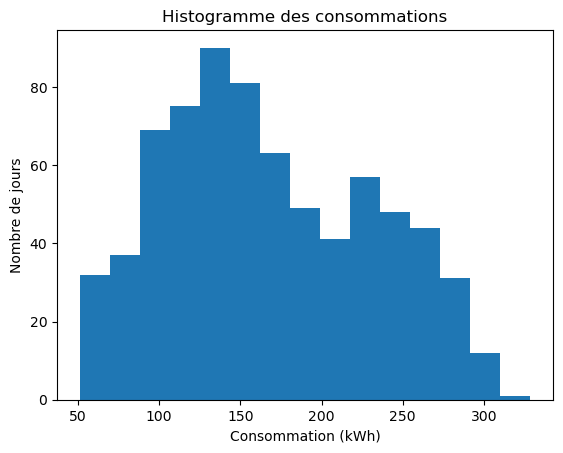

In [8]:
df["electricity_kWh"].plot(kind = "hist", title = "Histogramme des consommations", bins = 15)
plt.ylabel("Nombre de jours")
plt.xlabel("Consommation (kWh)")
plt.show()

In [9]:
Q1 = df["electricity_kWh"].quantile(0.25)
Q3 = df["electricity_kWh"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["electricity_kWh"] <(Q1 - 0.75*IQR)) | (df["electricity_kWh"] > (Q3 + 0.75*IQR))]
print(outliers)

           date  temperature_C  school_open  electricity_kWh
3    2022-01-04           -3.9            1            299.2
11   2022-01-12           -2.4            1            299.3
341  2022-12-08           -2.2            1            308.4
349  2022-12-16           -4.5            1            301.7
355  2022-12-22           -4.1            1            328.6
362  2022-12-29           -1.3            1            296.7
713  2023-12-15           -2.8            1            308.7
723  2023-12-25           -2.9            1            296.5


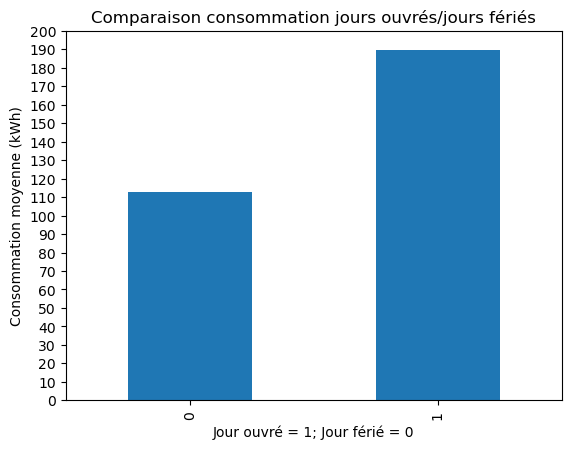

In [10]:
df.groupby("school_open")["electricity_kWh"].mean().plot(kind = "bar", title = "Comparaison consommation jours ouvrés/jours fériés")
plt.ylabel("Consommation moyenne (kWh)")
plt.xlabel("Jour ouvré = 1; Jour férié = 0")
plt.yticks(range(0,int(df["electricity_kWh"].mean())+ 40, 10))
plt.show()

In [11]:
Moy_conso_semaine = df[(df["school_open"] == 1)]["electricity_kWh"].mean()
print("Consommation moyenne des jours ouvrés:", Moy_conso_semaine)

Consommation moyenne des jours ouvrés: 189.72615384615384


In [12]:
Moy_conso_week_end = df[(df["school_open"] == 0)]["electricity_kWh"].mean()
print("Consommation moyenne des jours fériés:", Moy_conso_week_end)

Consommation moyenne des jours fériés: 112.96142857142858


In [17]:
df["date"] = pd.to_datetime(df["date"])
def saison(mois):
    if mois in [12,1,2]:
        return "Hiver"
    elif mois in [3,4,5]:
        return "Printemps"
    elif mois in [6,7,8]:
        return "Eté"
    else:
        return "Automne"
df["saison"] = df["date"].dt.month.apply(saison)

    

La moyenne des consommations en hiver est de: 224.54666666666662
La moyenne des consommations au printemps est de: 142.33423913043478
La moyenne des consommations en été est de: 111.45326086956523
La moyenne des consommations en automne est de: 193.75934065934064


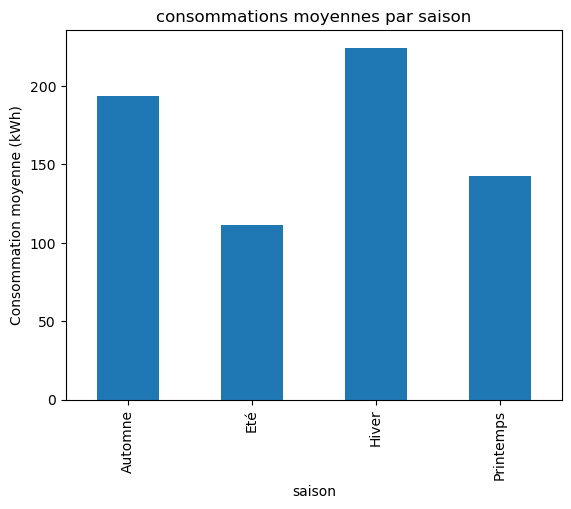

In [22]:
print("La moyenne des consommations en hiver est de:",df[(df["saison"]=="Hiver")]["electricity_kWh"].mean())
print("La moyenne des consommations au printemps est de:",df[(df["saison"]=="Printemps")]["electricity_kWh"].mean())
print("La moyenne des consommations en été est de:",df[(df["saison"]=="Eté")]["electricity_kWh"].mean())
print("La moyenne des consommations en automne est de:",df[(df["saison"]=="Automne")]["electricity_kWh"].mean())
df.groupby("saison")["electricity_kWh"].mean().plot(kind = "bar", title = "consommations moyennes par saison")
plt.ylabel("Consommation moyenne (kWh)")
plt.xlabel("saison")
plt.show()

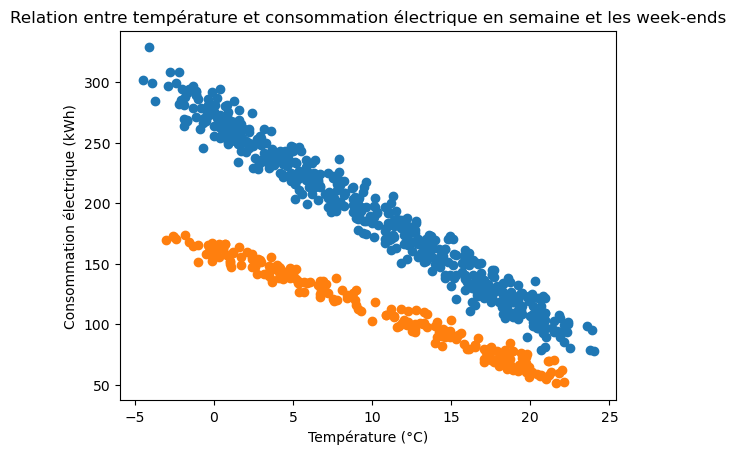

In [26]:
plt.scatter(df[df["school_open"] == 1]["temperature_C"], df[df["school_open"] == 1]["electricity_kWh"], label = "Jours d'école")
plt.scatter(df[df["school_open"] == 0]["temperature_C"], df[df["school_open"] == 0]["electricity_kWh"], label = "Jours fériés", alpha = 1)
plt.xlabel("Température (°C)")
plt.ylabel("Consommation électrique (kWh)")
plt.title("Relation entre température et consommation électrique en semaine et les week-ends")
plt.show()

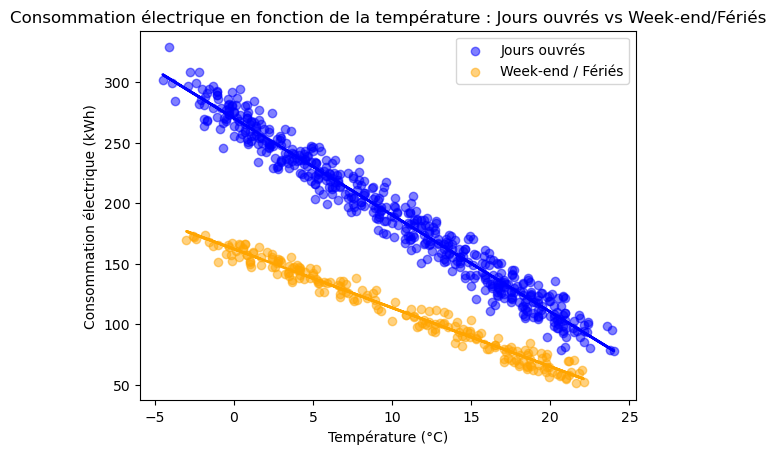

Jours ouvrés : chaque baisse de 1°C entraîne en moyenne une augmentation de 8.00 kWh de la consommation.
Week-ends/fériés : chaque baisse de 1°C entraîne en moyenne une augmentation de 4.86 kWh de la consommation.


In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

df_ouvres = df[df["school_open"] == 1]
df_feries = df[df["school_open"] == 0]

plt.scatter(df_ouvres["temperature_C"], df_ouvres["electricity_kWh"], alpha=0.5, label="Jours ouvrés", color="blue")
plt.scatter(df_feries["temperature_C"], df_feries["electricity_kWh"], alpha=0.5, label="Week-end / Fériés", color="orange")

model_ouvres = LinearRegression()
model_ouvres.fit(df_ouvres[["temperature_C"]], df_ouvres["electricity_kWh"])
pente_ouvres = model_ouvres.coef_[0]
plt.plot(df_ouvres["temperature_C"], model_ouvres.predict(df_ouvres[["temperature_C"]]), color="blue", linewidth=2)

model_feries = LinearRegression()
model_feries.fit(df_feries[["temperature_C"]], df_feries["electricity_kWh"])
pente_feries = model_feries.coef_[0]
plt.plot(df_feries["temperature_C"], model_feries.predict(df_feries[["temperature_C"]]), color="orange", linewidth=2)

plt.xlabel("Température (°C)")
plt.ylabel("Consommation électrique (kWh)")
plt.title("Consommation électrique en fonction de la température : Jours ouvrés vs Week-end/Fériés")
plt.legend()
plt.show()
print(f"Jours ouvrés : chaque baisse de 1°C entraîne en moyenne une augmentation de {abs(pente_ouvres):.2f} kWh de la consommation.")
print(f"Week-ends/fériés : chaque baisse de 1°C entraîne en moyenne une augmentation de {abs(pente_feries):.2f} kWh de la consommation.")


In [ ]:
print(f"Jours ouvrés : chaque baisse de 1°C entraîne en moyenne une augmentation de {abs(pente_ouvres):.2f} kWh de la consommation.")
print(f"Week-ends/fériés : chaque baisse de 1°C entraîne en moyenne une augmentation de {abs(pente_feries):.2f} kWh de la consommation.")